### Import data

In [1]:
include("importData.jl")
include("ODEmodel.jl")
include("plot.jl")

# import data from the path
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib");# in which:
# pop: population data
# g1, g2: g1 and g2 data
# initial: initial number of cells in g1 and in g2 at time 0


┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/OrdinaryDiffEq/DlSvy.ji for OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/DiffEqParamEstim/nWq0E.ji for DiffEqParamEstim [1130ab10-4a5a-5621-a13d-e4788d82bd4c]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/Optim/R5uoh.ji for Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/farnazm/.julia/compiled/v1.2/BlackBoxOptim/cmXuD.ji for BlackBoxOptim [a134a8b2-14d6-55f6-9291-3336d3ab0209]
└ @ Bas

### Estimate 

In [2]:
# i is the number of the column we are using from the data (# of trial)
i = 6

# initial guess
p  = [8.870525324, 8.492087169, 0.43447323, 7.67847790]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.005*ones(4)
upp = 0.1*ones(4)
params_ode = zeros(4, 8)

# ODE optimization and estimation of the parameters
for i in 1:8
    params_ode[:, i] = ODEoptimizer(low, upp, p, i, g1, g2, g1_0, g2_0)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.71 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 14054.66
Function evals per second = 14206.43
Improvements/step = 0.19500
Total function evaluations = 10109


Best candidate found: [0.0596127, 0.0331094, 0.00500001, 0.00500003]

Fitness: 312.985167262

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.60 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 16793.56
Function evals per second = 16966.51
Improvements/step = 0.22280
Total function evaluations = 10104


Best candidate fou

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Symbol) at ODEmodel.jl:57
└ @ Main /home/farnazm/dde/dde-constant-delay/DrugResponseModel.jl/src/ODEmodel.jl:57
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String, ::Bool) at ODEmodel.jl:57
└ @ Main /home/farnazm/dde/dde-constant-delay/DrugResponseModel.jl/src/ODEmodel.jl:57


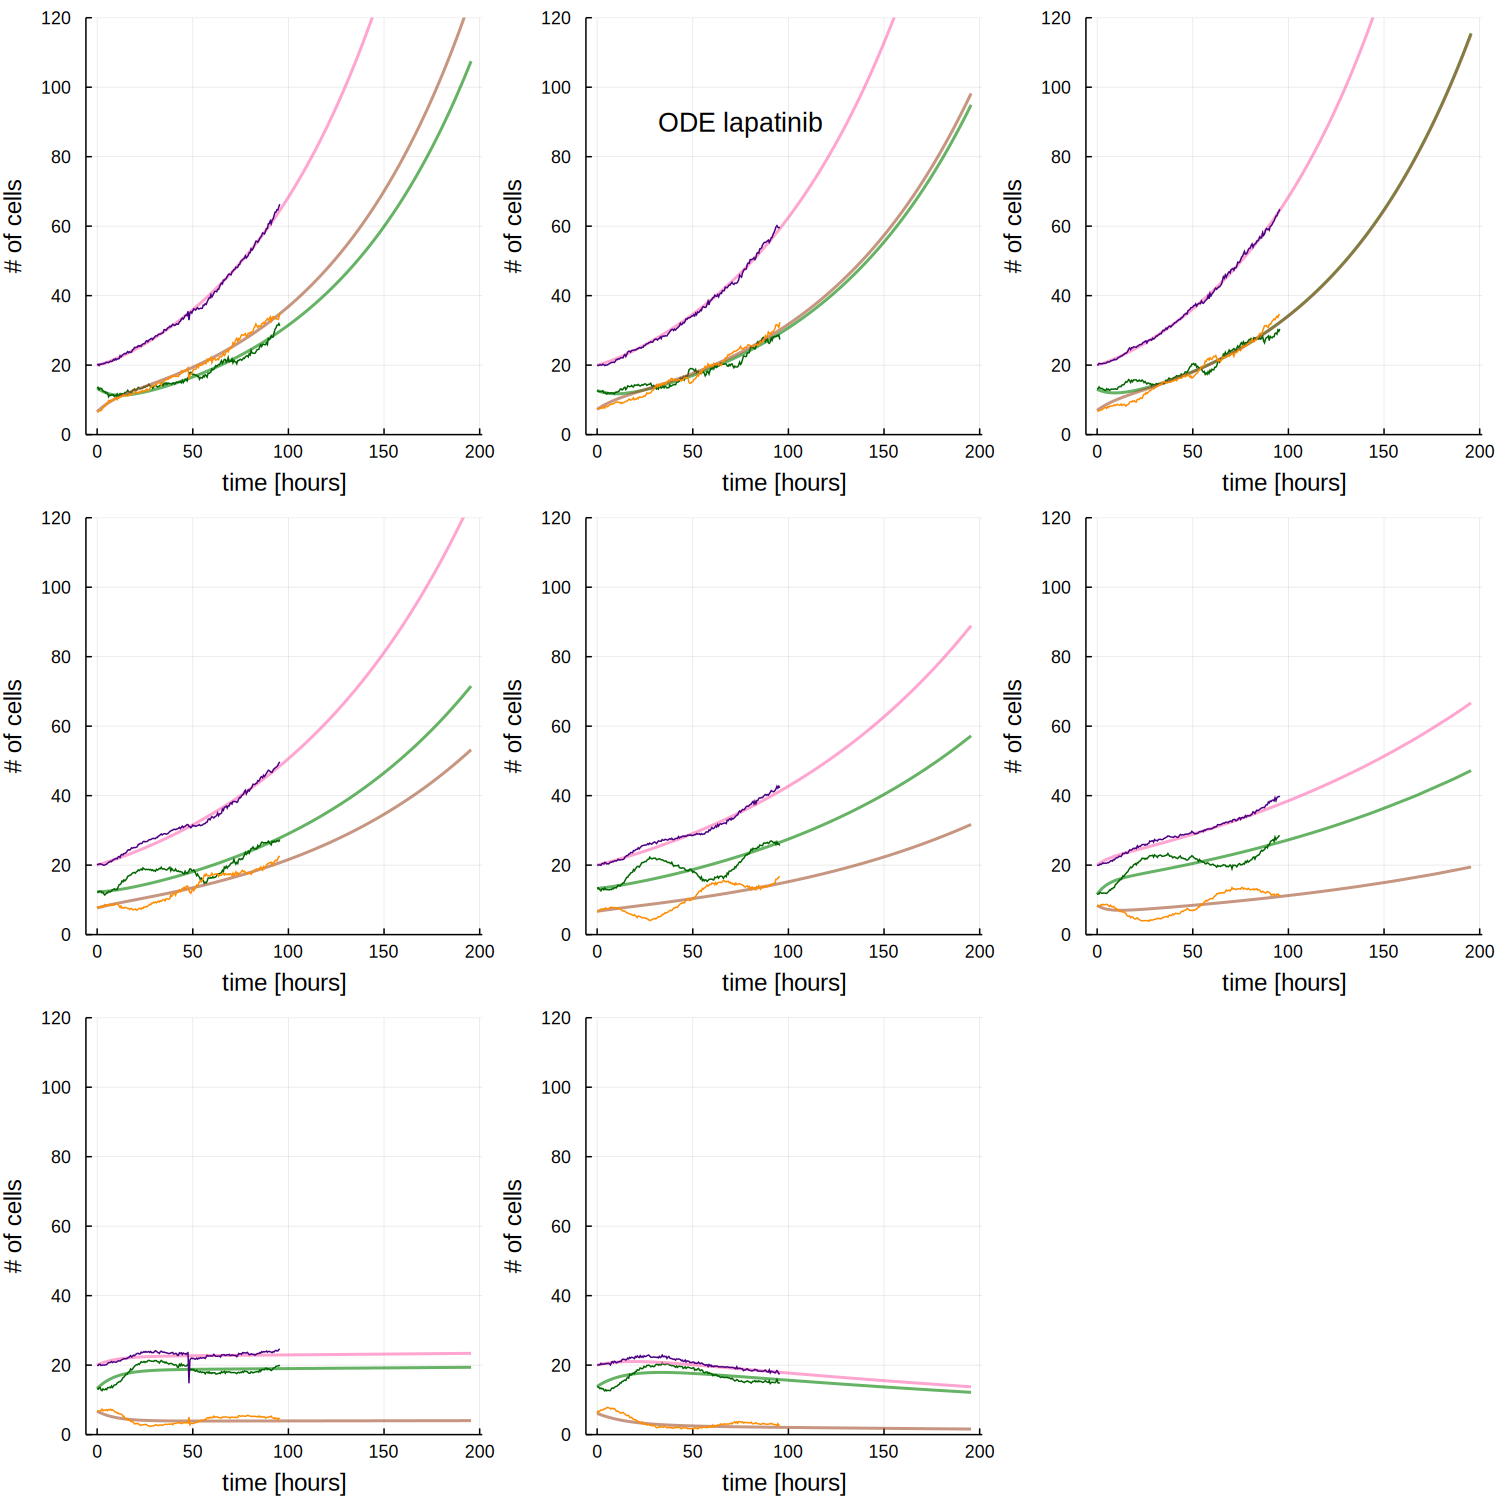

In [4]:
# plotting the fitted curves
r1 = ode_plotIt(params_ode[:, 1], g1, g2, g1_0, g2_0, pop, 1, "", :left)
r2 = ode_plotIt(params_ode[:, 2], g1, g2, g1_0, g2_0, pop, 2, "ODE lapatinib", false)
r3 = ode_plotIt(params_ode[:, 3], g1, g2, g1_0, g2_0, pop, 3, "", false)
r4 = ode_plotIt(params_ode[:, 4], g1, g2, g1_0, g2_0, pop, 4, "", false)
r5 = ode_plotIt(params_ode[:, 5], g1, g2, g1_0, g2_0, pop, 5, "", false)
r6 = ode_plotIt(params_ode[:, 6], g1, g2, g1_0, g2_0, pop, 6, "", false)
r7 = ode_plotIt(params_ode[:, 7], g1, g2, g1_0, g2_0, pop, 7, "", false)
r8 = ode_plotIt(params_ode[:, 8], g1, g2, g1_0, g2_0, pop, 8, "", false)
plot(r1, r2, r3, r4, r5, r6, r7, r8)
plot!(size=(1000, 1000))
ylims!((0.0, 120.0))